<img src="https://balloon.tam.ch/share/1315e025c077ca37d3f521b50debe367" alt="Clustering" />

# Notebook 4: Kategorien entdecken mit dem $k$-Means-Algorithmus

In diesem Notebook wenden wir den $k$-Means-Algorithmus auf einen Datensatz eines (fiktiven) Online-Shops an. Er enthält das Einkommen (engl. _income_) und einen Score für die Ausgaben (engl. _spending_, mit Werten von _1 wenig_ bis _100 viel_) von Kundinnen und Kunden.

Zunächst importieren wir die Programmbibliotheken `pandas` und `matplotlib`. 

<b>Neu dazu kommt die Klasse `KMeans` aus der Programmbibliothek scikit-learn. Diese verwenden wir für den $k$-Means-Algorithmus.</b>

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

<div class="alert alert-box alert-success">
    
#### Aufgabe 1: Datensatz einlesen

Erstellen Sie eine Variable mit dem Namen `customers`, indem Sie mit pandas die Datei `customers.csv` einlesen. Überprüfen Sie mit `head()`, ob das Einlesen geklappt hat.

</div>

In [110]:
# Ihr Code hier
data = pd.read_csv("./datasets/customers.csv")
data.head()

,customerID,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Da wir uns nur für das Einkommen und die Ausgaben interessieren, können wir die restlichen Spalten aus dem Datensatz entfernen. Dazu selektieren wir in Customers die Spalten, die wir behalten möchten, und weisen das Resultat der Variablen `customers` zu. Das ursprüngliche DataFrame wird dadurch überschrieben.
```python
customers = customers[['spalte1', 'spalte2']]
``` 

<div class="alert alert-box alert-success">
    
#### Aufgabe 2: Datensatz reduzieren

**a)** Löschen Sie alle Spalten aus dem Dataframe `customers` bis auf `income` und `spending` und kontrollieren Sie anschliessend mit `customers.head()`, ob das Dataframe nur noch die oben genannten zwei Spalten beinhaltet.

**b)** Überprüfen Sie mit einem Streudiagramm, ob in den Streupunkten Cluster erkennbar sind. (Bei mehr als 3 Dimensionen ist dieser Schritt nicht mehr so einfach durchführbar).

</div>

In [111]:
# Ihr Code hier
customers = data[["income", "spending"]]
customers.head()

,income,spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='income', ylabel='spending'>

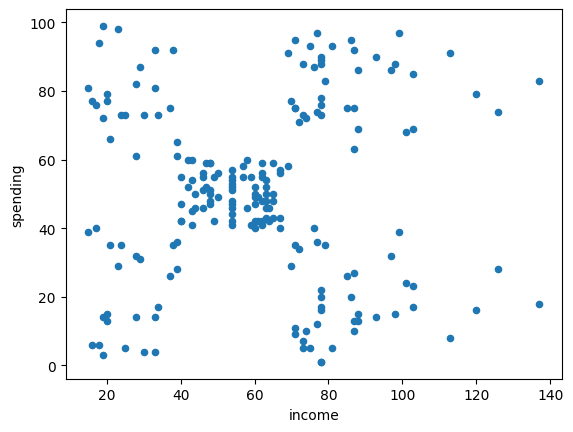

In [112]:
customers.plot.scatter(x="income", y="spending")

Als Vorbereitung für den $k$-Means Algorithmus müssen wir einen Wert für $k$, die Anzahl Cluster, definieren. Wir starten mit $k$=2 :

In [113]:
k=2

Die restlichen Schritte des $k$-Means-Algorithmus werden mit dem Objekt `KMeans` der Python-Bibliothek `sklearn` ausgeführt, die wir weiter oben importiert haben. Beim Aufruf müssen wir die folgenden Schlüsselwort-Argumente übergeben:

* `n_clusters`: Die Anzahl Clusters $k$
* `random_state`: Eine beliebige Zahl zur Initialisierung des zufälligen Wahl der Anfangs-Schwerpunkte. Der genaue Wert ist nicht entscheidend. Dadurch, dass wir einen bestimmten Wert setzen, können wir den Algorithmus mehrmals ausführen und immer die gleichen Resultate dabei erzielen. Dieses Prinzip kennen wir bereits aus dem `seed()`-Befehl aus der `random` Bibliothek.
* `n_init` : Da eine ungünstige Wahl der anfänglichen Schwerpunkte zu einem schlechten Ergebnis führen kann, ist `KMeans` so programmiert, dass es den Algorithmus mehrmals mit verschiedenen Anfangs-Schwerpunkten ausführt und das beste der dabei entstandenen Clusterings behält. Ein üblicher Wert für diesen Parameter wäre z.B. `10`.

<div class="alert alert-box alert-success">

#### Aufgabe 3: Den $k$-Means-Algorithmus ausführen

**a)** Erstellen Sie eine Variable mit dem Namen `kmeans` und weisen Sie ihr `KMeans(...)` zu, wobei die oben erwähnten Parameter so gesetzt werden, dass die Wahl der Anfangsschwerpunkte zufällig festgelegt wird und $k$ (momentan 2) Clusters erstellt werden.

**b)** Um den $k$-Means-Algorithmus auszuführen, rufen wir auf der Instanz (Objekt) `kmeans` die Methode `fit()` auf und übergeben ihr als Argument den zu gruppierenden Datensatz. Rufen Sie diesen Befehl so auf, dass der Datensatz `customers` gruppiert wird.

</div>

In [114]:
# a) K-means vorbereiten
kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)

# b) K-means auf customers anwenden
kmeans.fit(customers)

KMeans(n_clusters=2, n_init=10, random_state=12)

Nach der Ausführung des Befehls `fit()` hat der Algorithmus $k$ (d.h. zwei) Schwerpunkte definiert und jeden Datenpunkt seinem nächstgelegenen Schwerpunkt zugewiesen. Anschliessend hat er den **Within-Cluster sum of squares** (WCSS) Wert berechnet.

Diese Informationen können wir wie folgt auslesen:

#### Attribut 1: `cluster_centers_`

Im Attribut `cluster_centers_` findet man die Koordinaten der Cluster-Schwerpunkte. Jede innere Liste enthält die $x$- und $y$-Koordinate eines Schwerpunkts. Z.B. könnte für 3 Schwerpunkte das Ergebnis wie folgt aussehen :

```python
[[13, 200],  # <-- Schwerpunkt von Cluster 1
 [323, 393], # <-- Schwerpunkt von Cluster 2
 [34, 527]   # <-- Schwerpunkt von Cluster 3
  # usw.
]
```

#### Attribut 2: `inertia_`

Im Attribut `inertia_` (englisch *inertia* = Trägheit) findet man zudem den **WCSS-Wert** des eben durchgeführten Clusterings, also die Summe aller quadrierten Abstände zwischen den Datenpunkten und ihren Schwerpunkten. Je kleiner dieser Wert ist, desto kompakter sind die Clusters.

<div class="alert alert-box alert-success">

#### Aufgabe 4: Schwerpunkte und WCSS auslesen

Lesen Sie aus `kmeans` die Koordinaten und den WCSS-Wert aus und tragen Sie diese unten ein.
</div>

In [115]:
# Koordinaten der Clusterschwerpunkte
centers = kmeans.cluster_centers_

centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

In [116]:
# WCSS-Wert
wcss = kmeans.inertia_

wcss

181363.59595959593

**Antwort**:
* `(x,y)`-Koordinaten von Schwerpunkt 1 :
* `(x,y)`-Koordinaten von Schwerpunkt 2 : 
* WCSS-Wert : 

Eine naheliegende Frage ist nun, ob wir wir mit $k=3$ ein besseres Clustering erzielen können. Oder anders gefragt: Wird der Wert von WCSS _kleiner_, wenn wir den Wert von $k$ von 2 auf 3 erhöhen?

<div class="alert alert-box alert-success">

#### Aufgabe 5: Clustering mit $k=3$

**a)** Setzen Sie $k=3$ und führen Sie mit der Variable `kmeans3` den $k$-Means-Algorithmus mit drei Clustern durch.

**b)** Führen Sie `kmeans3.fit(customers)` nochmals aus und beurteilen Sie, ob dieses Clustering besser ist als mit $k=2$.

</div>

In [117]:
# a) K-means vorbereiten
k = 3

kmeans3 = KMeans(n_clusters=k, random_state=12, n_init=10)


# b) K-means auf customers anwenden
kmeans3.fit(customers)

kmeans3.inertia_

106348.37306211118

**Antwort**
* Der WCSS-Wert für $k=3$ ist : 
* Von den zwei Clusters war das für $k=...$ besser (2 oder 3 eintragen) : 

Es ist nicht erstaunlich, dass eine grössere Anzahl an Cluster einen tieferen WCSS Wert liefert. Den tiefsten WCSS Wert bekommt man sogar, wenn man so viele Cluster definiert, dass jeder Datenpunkt sein eigenes Cluster bildet. So ein Clustering ist allerdings nichtsaussagend. Deswegen fragen wir uns, ab wann es sich nicht mehr lohnt eine grössere Anzahl von Clustern zu definieren, weil die Verbesserungen nur noch marginal werden. Das können wir mit der Ellenbogen-Methode herausfinden.

### Die Ellenbogen-Methode

Um die Ellenbogen-Methode anzuwenden, wenden wir zunächst nacheinenander den $k$-Means-Algorithmus für alle $k$-Werte zwischen 1 und 10 an und speichern nach jedem Durchlauf den $WCSS$-Wert in der Liste `wcss`. 

<div class="alert alert-box alert-success">

#### Aufgabe 6: Ellenbogen-Methode anwenden

Um die Ellenbogen-Methode anzuwenden, wenden wir zunächst nacheinenander den $k$-Means-Algorithmus für alle $k$-Werte zwischen 1 und 10 an und speichern nach jedem Durchlauf den $WCSS$-Wert in der Liste `wcss`. Implementieren Sie dies mit Hilfe einer for-Schleife.

__Tipp__: Mit `li.append(123)` kann man den Wert `123` der Liste `li` hinzufügen.
</div>

In [118]:
wcss = []
for k in range(1, 11):
    # Ihr Code hier
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=10)

    # b) K-means auf customers anwenden
    kmeans.fit(customers)

    wcss.append(kmeans.inertia_)

# WCSS-Wert ausgeben
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37239.83554245604,
 30227.606513152015,
 25012.917069885472,
 21862.092672182887,
 19643.655552199743]

Nun erstellen wir ein DataFrame `wcssdf` mit den Spalten `k` und `wcss`:

In [119]:
wcssdf =  pd.DataFrame.from_dict({'k': range(1, 11), 'wcss': wcss})
wcssdf.head()

,k,wcss
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448


<div class="alert alert-box alert-success">

#### Aufgabe 7: Ellenbogen-Methode anwenden

Erstellen Sie ein Liniendiagramm mit den WCSS-Werten von der letzen Aufgabe. Beschriften Sie anschliessend die Achsen und setzen Sie den Titel `"Die Ellenbogen-Methode"`.

Nützliche matplotlib-Befehle:
* `dataframe.plot()`. Beispiel: `tips.plot(x='total_bill', y='tip')`: Ein Liniendiagramm für das Dataframe `tips` mit $x$-Koordinaten aus der Spalte `total_bill` und $y$-Koordinaten aus der Spalte `tip` erstellen. 
* `plt.title()`: Den Titel des Diagramms setzen
* `plt.xlabel()`: Die $x$-Achse beschriften
* `plt.ylabel()`: Die $y$-Achse beschriften
* `plt.show()`: Unnötige Ausgaben von Befehlen unterdrücken (am Ende aufrufen)

</div>

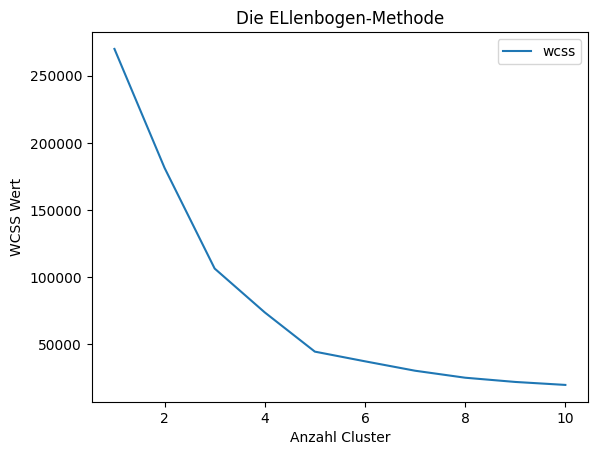

In [120]:
# Ihr Code hier
wcssdf.plot(x="k", y="wcss")

plt.title("Die ELlenbogen-Methode")
plt.xlabel("Anzahl Cluster")
plt.ylabel("WCSS Wert")
plt.show()

<div class="alert alert-box alert-success">

#### Aufgabe 8: Optimale Cluster-Zahl bestimmen

Was ist gemäss der Ellenbogen-Methode die optimale Anzahl von Clustern?

</div>

**Antwort**: Der Knick ist bei diesem $k$-Wert am deutlichsten: **5**

## Die Kategorien der Datenpunkte auslesen

Jetzt wo wir die optimale Anzahl von Clustern kennen, führen wir nochmals den $k$-Means-Algorithmus mit dem entsprechenden $k$ aus. Um für alle Punkte im Datensatz die entsprechende Kategorie zu bekommen, verwenden wir statt `fit()` die Methode `fit_predict()`. Diese gibt als Rückgabewert eine `ndarray`-Instanz zurück, die gleich viele Elemente hat wie der Datensatz Zeilen. Die Elemente sind natürliche Zahlen zwischen 0 und $k-1$, welche für die $k$ Cluster stehen. Das erste Element im `ndarray` entspricht folglich dem Cluster des ersten Datenpunktes, das zweite Element der Kategorie des zweiten Datenpunktes, usw.

<div class="alert alert-box alert-success">

#### Aufgabe 9: Datenpunkte kategorisieren

Führen Sie den $k$-Means-Algorithmus mit der optimalen Anzahl von Clustern aus une ermitteln Sie (mit `fit_predict` statt `fit`) die Kategorien der Datenpunkte. Weisen Sie diese der neuen Spalte `cluster` im DataFrame `customers` zu:

`customers['cluster'] = ...`
</div>

In [121]:
# Ihr Code hier
optimal_k = 5

final_kmeans = KMeans(n_clusters=optimal_k, random_state=12, n_init=10)
# final_kmeans.fit_predict(customers)
customers["cluster"] = final_kmeans.fit_predict(customers)


C:\Users\fiedl\AppData\Local\Temp\ipykernel_28216\968566758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers["cluster"] = final_kmeans.fit_predict(customers)


Nun können wir die Spalte `cluster` in eine Spalte mit Datentyp `category` umwandeln. Dies ist notwendig, damit wir in der nächsten Aufgabe ein Streudiagramm erstellen können, in dem die Datenpunkte je nach Clusterzugehörigkeit anders eingefärbt sind.

In [122]:
customers['cluster'] = customers['cluster'].astype('category')

C:\Users\fiedl\AppData\Local\Temp\ipykernel_28216\462186987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['cluster'] = customers['cluster'].astype('category')


## Die Cluster visualisieren

Da wir nur zwei unabhängige Variablen haben, können wir die Cluster in einem zweidimensionalen Streudiagramm visualisieren. Um die Cluster dabei zu erkennen, können wir den Wert der Spalte `cluster` zur Färbung des jeweiligen Datenpunktes verwenden. Damit bekommen die Datenpunkte im gleichen Cluster die gleiche Farbe.

<div class="alert alert-box alert-success">

#### Aufgabe 10: Cluster visualisieren

__a)__ Zeichnen Sie mit `customers.plot.scatter()` ein Streudiagramm aller Datenpunkte des DataFrames `customers`. Verwenden Sie folgende Parameter:
  * `x` : die Spalte `income`
  * `y` : die Spalte `spending`
  * `colormap` : `'rainbow'`
  * `c` : die Spalte `cluster`

__b)__ Zeichnen Sie nun mit dem Befehl unten die Cluster-Schwerpunkte ein. 

```python
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='gold', s=200, label='Schwerpunkte')
```


__c)__ Beschriften Sie die Achsen und geben Sie dem Diagramm den Titel `Kunden-Cluster`.
</div>

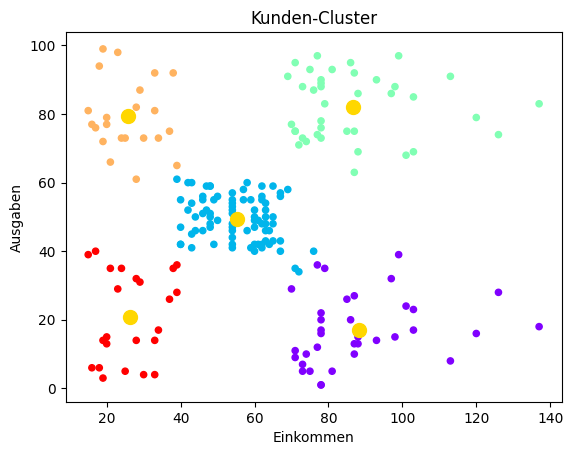

In [123]:
# Ihr Code hier
customers.plot.scatter(x="income", y="spending", c=customers["cluster"], colormap='rainbow')

# Das Plotten der Clusterzentren
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='gold', s=100, label='Schwerpunkte')

plt.title("Kunden-Cluster")
plt.xlabel("Einkommen")
plt.ylabel("Ausgaben")

plt.show()